#  Webscraping and Making a United States Navy Strength Timeline

In this project we will be web scraping United States navy ship data from https://www.history.navy.mil using BeautifulSoup and putting into a timeline that shows the number of US Navy ships from 1886 to 2010.

In [23]:
import requests
from bs4 import BeautifulSoup
import lxml
from lxml import html
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

## Getting the Data

Here we gather the amount of ships according to year from the navy history website using CSS selectors and put it into a Data Frame.

In [24]:
# Get request for website.
r = requests.get('https://www.history.navy.mil/content/history/nhhc/research/histories/ship-histories/us-ship-force-levels.html#1886')

In [25]:
# Scraping Dates.
tree = html.fromstring(r.content)
# Getting text from CSS selectors contained in the "DATE" table.
Dates = tree.xpath("//th[contains(.,'DATE')]/following-sibling::th/text()") 
print(Dates)

['12/86', '12/87', '12/88', '12/89', '12/90', '12/91', '12/92', '12/93', '12/94', '12/95', '12/96', '12/97', '12/98', '12/99', '12/00', '12/01', '12/02', '12/03', '12/04', '12/05', '12/06', '12/07', '12/08', '12/09', '12/10', '12/11', '12/12', '12/13', '12/14', '12/15', '12/16', '4/6/17', '11/11/18', '7/1/19', '7/1/20', '7/1/21', '7/1/22', '7/1/23', '7/1/24', '7/1/25', '7/1/26', '7/1/27', '7/1/28', '7/1/29', '7/1/30', '7/1/31', '7/1/32', '7/1/33', '7/1/34', '4/1/35*', '7/1/36', '9/1/37*', '6/30/38', '6/30/39', '6/30/40', '12/7/41', '12/31/42', '12/31/43', '12/31/44', '8/14/45*', '6/30/46', '6/30/47', '6/30/48', '6/30/49', '6/30/50', '6/30/51', '6/30/52', '6/30/53', '6/30/54', '6/30/55', '6/30/56', '6/30/57', '6/30/58', '6/30/59', '6/30/60', '6/30/61', '6/30/62', '6/30/63', '6/30/64', '6/30/65', '6/30/66', '6/30/67', '6/30/68', '6/30/69', '6/30/70', '6/30/71', '6/30/72', '6/30/73', '6/30/74', '6/30/75', '6/30/76', '6/30/77', '9/30/78', '9/30/79', '9/30/80', '9/30/81', '9/30/82', '9/30/8

In [26]:
# Scraping Total ship amounts.
numbers = tree.xpath("//th[contains(.,'TOTAL ACTIVE')]/following-sibling::td/text()") 

print(numbers)

['38', '39', '39', '43', '42', '46', '43', '43', '50', '55', '59', '72', '160', '133', '140', '141', '160', '175', '177', '174', '180', '180', '181', '187', '196', '202', '211', '214', '224', '231', '245', '342', '774', '752', '567', '384 (228rc)', '379 (7rc)', '365 (5rc)', '376 (3rc)', '370 (3rc)', '368 (3rc)', '357 (3rc)', '360 (2rc)', '356 (2rc)', '357 (3rc)', '308 (4rc)', '313 (4rc)', '311 (4rc)', '320 (1rc)', '320', '322', '335', '380', '394', '478', '790', '1782', '3699', '6084', '6768', '1248', '842', '737', '690', '634', '980', '1097', '1122', '1113', '1030', '973', '967', '890', '860', '812', '819', '900', '857', '859', '880', '909', '932', '933', '885', '743', '751', '654', '641', '587', '559', '536', '523', '531', '533', '530', '521*', '555', '533', '557', '571', '583', '594*', '573', '592', '570', '529', '471', '454', '404', '392', '375', '359', '344', '336', '318', '316', '313', '297', '292', '282', '281', '279', '282', '285\xa0', '288\xa0']


In [27]:
# Create data frame.
df = pd.DataFrame({'Date': Dates, 'Total Ships': numbers}) 

In [28]:
df.head()

,Date,Total Ships
0,12/86,38
1,12/87,39
2,12/88,39
3,12/89,43
4,12/90,42


## Data Preprocessing
Now we need check for non-numerical digits, change the date format, and get rid of unnecessary numbers and letters.

First we need to check to see what non non numerical or unnecessary characters are in the data set. 

There are reduced commission numbers (rc) that are in some of the total ship rows. We will get rid of them in a moment.

In [29]:
# Check for non numerical digits, also used to check if there are any left.
print('(rc): ', df['Total Ships'].str.contains('rc').sum(), 
'xa: ',df['Total Ships'].str.contains('xa').sum(),
'*: ',df['Total Ships'].str.contains(' \*').sum())

(rc):  14 xa:  0 *:  0


First real quick, lets fix the dates so they show the full years instead of just the last two digits. Here we add the correct century number to it's counterpart.

In [30]:
# Processing the dates into a better format for plotting.
df['Date'].loc[0:13] = '18' + df['Date'].loc[0:13].str[3:5] 
df['Date'].loc[14:30]  = '19' + df['Date'].loc[14:30].str[3:5]
df['Date'].loc[31:31]  = '19' + df['Date'].loc[31:31].str[4:6]
df['Date'].loc[32:32]  = '19' + df['Date'].loc[32:32].str[6:8]
df['Date'].loc[33:48]  = '19' + df['Date'].loc[33:48].str[4:6]
df['Date'].loc[49:51]  = '19' + df['Date'].loc[49:51].str[4:6]
df['Date'].loc[52:55]  = '19' + df['Date'].loc[52:55].str[5:7]
df['Date'].loc[56:58]  = '19' + df['Date'].loc[56:58].str[6:8]
df['Date'].loc[59:113]  = '19' + df['Date'].loc[59:113].str[5:7]
df['Date'].loc[114:124]  = '20' + df['Date'].loc[114:124].str[5:7]

Now we will clean up the ship data once and for all!

Here we we strip the excess strings out of each total ship row so that we perserve the real number of ship strength for that row. Then we convert it to a float.



In [31]:
 # Cleaning ship data.
df['Total Ships'].loc[0:48] = df['Total Ships'].loc[0:48].str[:3]
df['Total Ships'].loc[95:101] = df['Total Ships'].loc[95:101].str[:3]

In [32]:
# change to numerical data type.
df['Total Ships'] = df['Total Ships'].astype(float)

In [33]:
df.head()

,Date,Total Ships
0,1886,38.0
1,1887,39.0
2,1888,39.0
3,1889,43.0
4,1890,42.0


## Creating the Time Series graph

Here we make a large line graph showing ship strength from 1886 to 2010. This graph can be clicked on, zoomed in, and moved around for easy viewing.

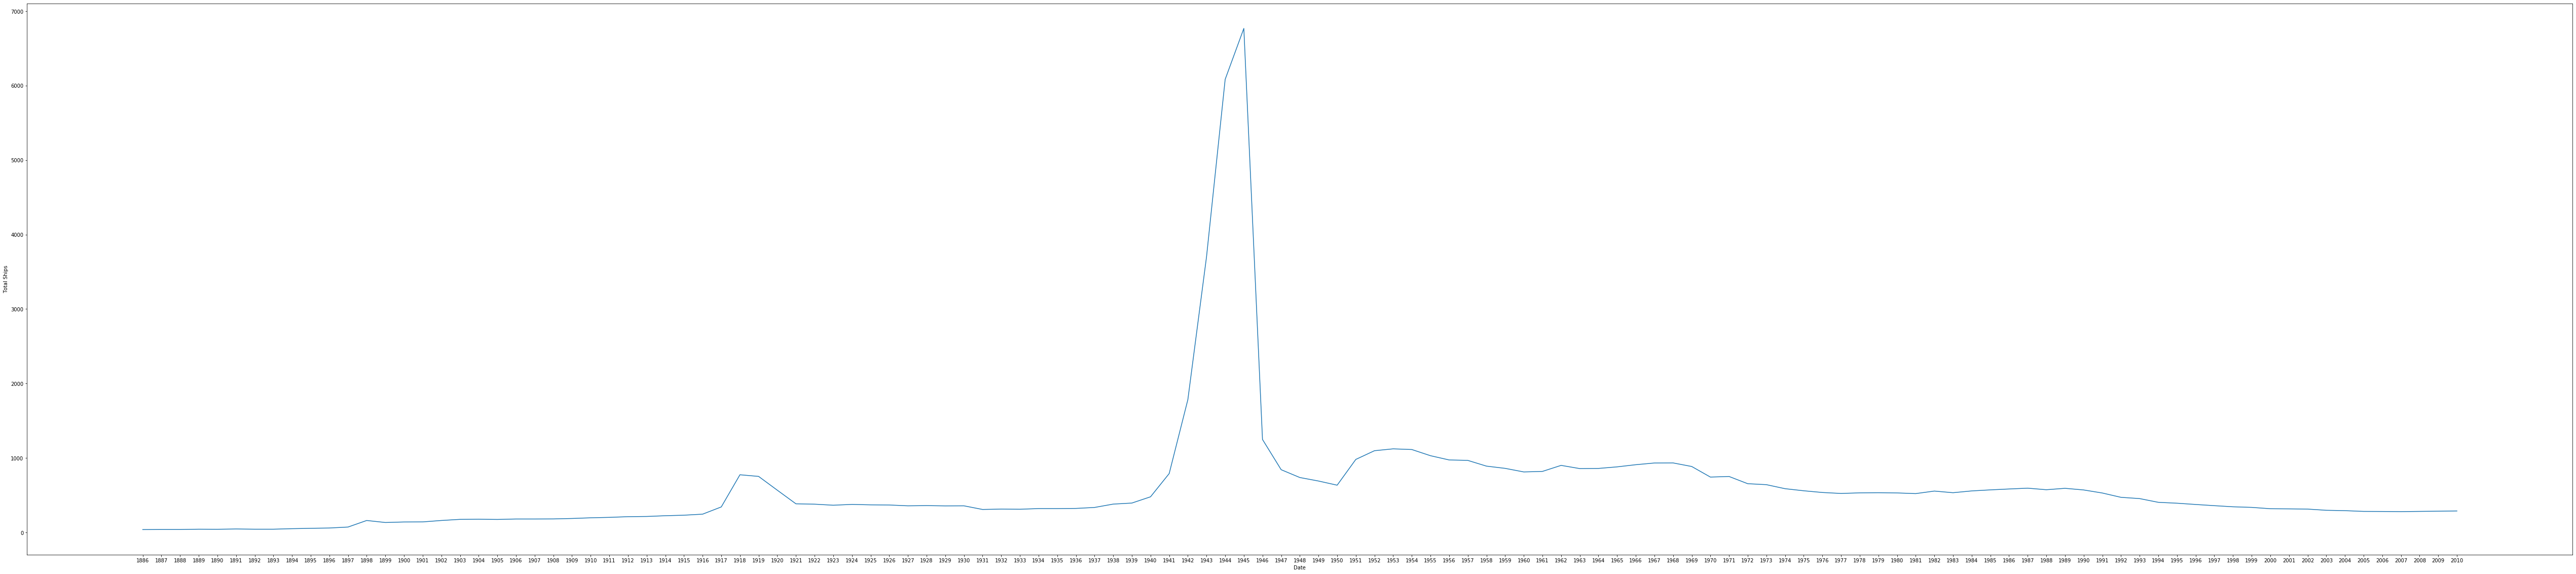

In [34]:
# Plot graph.
plt.figure(figsize=(90,20))

sns.lineplot(x='Date', y='Total Ships', data = df)

